<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Automatidata-Regression-Model/blob/main/Automatidata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# upload df
df = pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
df.shape

(22699, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# check for missing values
df.isna().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0


In [7]:
# describe
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [8]:
# converting 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [9]:
# create a column as 'duration' in seconds
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0


# Analyze

In [10]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0


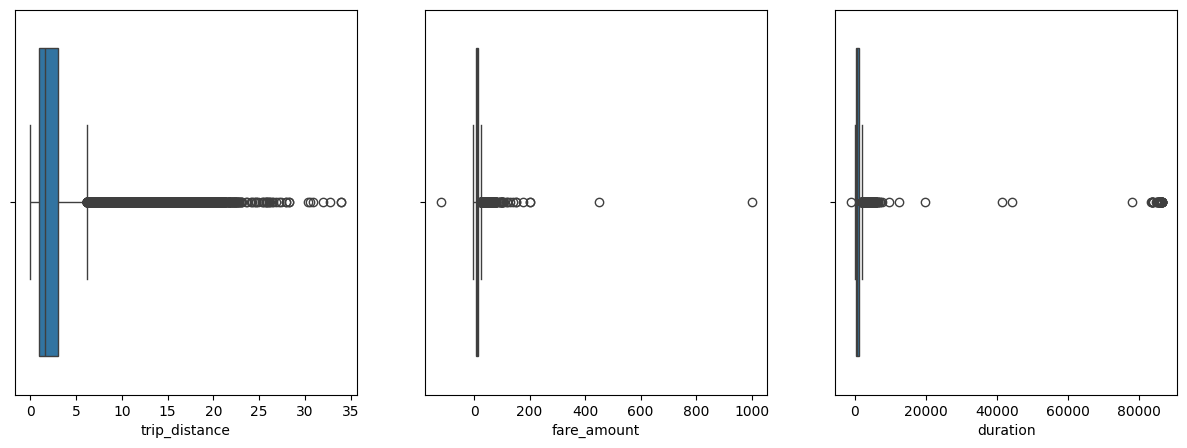

In [11]:
# create a box plot for outliers for 'trip_distance', 'fare_amount', and 'duration'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=df['trip_distance'], ax=ax[0])
sns.boxplot(x=df['fare_amount'], ax=ax[1])
sns.boxplot(x=df['duration'], ax=ax[2])
plt.show()

In [12]:
df['trip_distance'].describe()

,trip_distance
count,22699.000000
mean,2.913313
std,3.653171
min,0.000000
25%,0.990000
50%,1.610000
75%,3.060000
max,33.960000


In [13]:
# get the percentage of 0's in total
print(df[df['trip_distance'] == 0].shape[0] / df.shape[0] * 100)

0.6520111018106525


Due to it being extremely insignificant, we will not make any change to this column.

In [14]:
# fare amount describe
df['fare_amount'].describe()

,fare_amount
count,22699.000000
mean,13.026629
std,13.243791
min,-120.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,999.990000


In [15]:
# replace values less than 0 with 0
df['fare_amount'] = df['fare_amount'].apply(lambda x: 0 if x < 0 else x)

# check again
df['fare_amount'].min()

0.0

In [16]:
# define an outlier imputer function to assign outliers to IQR
def outlier_imputer(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

In [17]:
outlier_imputer(df, 'fare_amount')

# describe 'fare amount' again
df['fare_amount'].describe()

,fare_amount
count,22699.000000
mean,11.606583
std,6.776358
min,0.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,26.500000


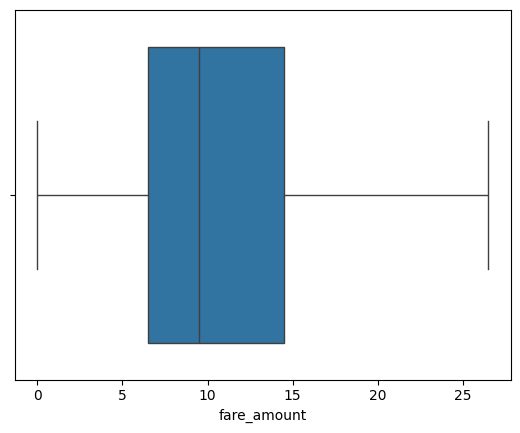

In [18]:
# plot fare amount again
sns.boxplot(x=df['fare_amount'])
plt.show()

In [19]:
# describe duration
df['duration'].describe()

,duration
count,22699.000000
mean,1020.826600
std,3719.788923
min,-1019.000000
25%,399.000000
50%,671.000000
75%,1103.000000
max,86373.000000


In [20]:
# assign every negative value to zero
df['duration'] = df['duration'].apply(lambda x: 0 if x < 0 else x)

# check again
df['duration'].min()

0.0

In [21]:
# apply outlier_imputer
outlier_imputer(df, 'duration')

# describe duration again
df['duration'].describe()

,duration
count,22699.000000
mean,820.075642
std,554.591819
min,0.000000
25%,399.000000
50%,671.000000
75%,1103.000000
max,2159.000000


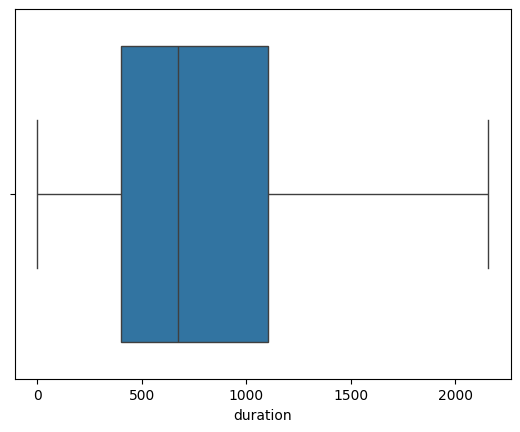

In [22]:
# plot duration again
sns.boxplot(x=df['duration'])
plt.show()

In [23]:
# create a 'pickup_dropoff' column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

df['pickup_dropoff'].head()

,pickup_dropoff
0,100 231
1,186 43
2,262 236
3,188 97
4,4 112


In [24]:
# group by pickup_dropoff for mean trip distance
grouped = df.groupby('pickup_dropoff')['trip_distance'].mean()

grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [25]:
# Convert 'grouped' Series to a dictionary
grouped_dict = grouped.to_dict()

# Display first few items of the dictionary to confirm structure
print({k: grouped_dict[k] for k in list(grouped_dict)[:5]})

{'1 1': 2.433333333333333, '10 148': 15.7, '100 1': 16.89, '100 100': 0.25333333333333335, '100 107': 1.18}


In [26]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0,4 112,4.435000


In [27]:
# repeat the steps for mean_distance to create 'mean_duration' column

grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,844.0,100 231,3.521667,1255.333333
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,1590.0,186 43,3.108889,1416.111111
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,432.0,262 236,0.881429,435.000000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,1815.0,188 97,3.700000,1815.000000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,1003.0,4 112,4.435000,877.000000


In [28]:
# create a day of the week from 1 to 7 as Monday to Sunday numerically
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day_of_week
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,844.0,100 231,3.521667,1255.333333,5
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,1590.0,186 43,3.108889,1416.111111,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,432.0,262 236,0.881429,435.000000,4
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,1815.0,188 97,3.700000,1815.000000,6
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,1003.0,4 112,4.435000,877.000000,5


In [29]:
# create a month column from beginning of the year to end numerically 1, 2, ...
df['month'] = df['tpep_pickup_datetime'].dt.month

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day_of_week,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,844.0,100 231,3.521667,1255.333333,5,3
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,1590.0,186 43,3.108889,1416.111111,1,4
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,432.0,262 236,0.881429,435.000000,4,12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,1815.0,188 97,3.700000,1815.000000,6,5
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,1003.0,4 112,4.435000,877.000000,5,4


In [30]:
# create an hour column with military format
df['hour'] = df['tpep_pickup_datetime'].dt.hour

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day_of_week,month,hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,844.0,100 231,3.521667,1255.333333,5,3,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,1590.0,186 43,3.108889,1416.111111,1,4,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,432.0,262 236,0.881429,435.000000,4,12,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,1815.0,188 97,3.700000,1815.000000,6,5,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,1003.0,4 112,4.435000,877.000000,5,4,23


In [31]:
# create an hour column with military format
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Define rush hour conditions for weekdays
# Weekdays are 0-4 (Monday-Friday)
# Rush hour is 6:00 to 9:59 (morning) or 16:00 to 19:59 (evening)

is_weekday = (df['day_of_week'] >= 0) & (df['day_of_week'] <= 4)
morning_rush = (df['hour'] >= 6) & (df['hour'] < 10)
evening_rush = (df['hour'] >= 16) & (df['hour'] < 20)

# Combine conditions: rush_hour is 1 if it's a weekday AND (morning rush OR evening rush)
# Otherwise, rush_hour is 0
df['rush_hour'] = ((is_weekday) & (morning_rush | evening_rush)).astype(int)

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day_of_week,month,hour,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,844.0,100 231,3.521667,1255.333333,5,3,8,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,1590.0,186 43,3.108889,1416.111111,1,4,14,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.3,8.75,432.0,262 236,0.881429,435.000000,4,12,7,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.3,27.69,1815.0,188 97,3.700000,1815.000000,6,5,13,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.3,17.80,1003.0,4 112,4.435000,877.000000,5,4,23,0


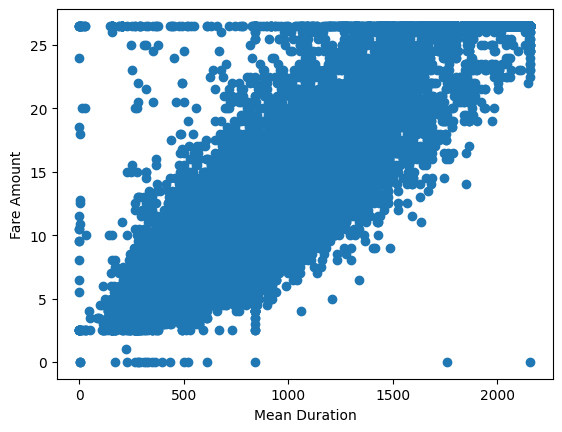

In [32]:
# create a scatterplot between mean_durationa and fare_amount
plt.scatter(df['mean_duration'], df['fare_amount'])
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')
plt.show()

In [33]:
# isolating modeling values
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day_of_week', 'month', 'hour'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


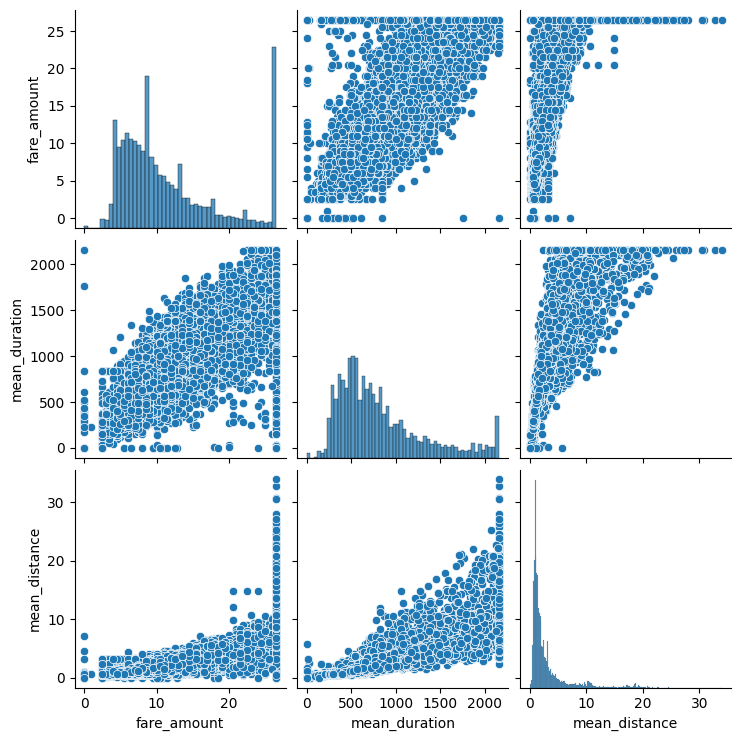

In [34]:
# createa a pairplot for 'fare amount', 'mean_duration', and 'mean_distance'
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']])
plt.show()

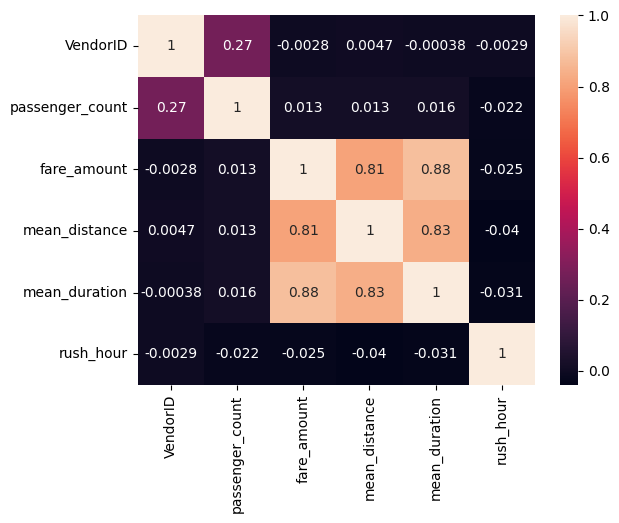

In [35]:
# get correlation heatmap
sns.heatmap(df2.corr(), annot=True)
plt.show()

# Construct

In [36]:
# info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [37]:
# x and y values, y = 'fare_amount'
x = df2.drop('fare_amount', axis=1)
y = df2['fare_amount']

x.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,1255.333333,0
1,1,1,3.108889,1416.111111,0
2,1,1,0.881429,435.000000,1
3,2,1,3.700000,1815.000000,0
4,2,1,4.435000,877.000000,0


In [38]:
# convert 'VendorID' to str
x['VendorID'] = x['VendorID'].astype(str)

In [39]:
# get dummies for x
x = pd.get_dummies(x, drop_first=True)
x.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,1255.333333,0,True
1,1,3.108889,1416.111111,0,False
2,1,0.881429,435.000000,1,False
3,1,3.700000,1815.000000,0,True
4,1,4.435000,877.000000,0,True


In [40]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
# standardize x values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

[[-0.49880314 -0.03750269  0.11931697 -0.65545204  0.89575785]
 [-0.49880314  0.45538104  0.05556001  1.52566463  0.89575785]
 [ 0.28284738 -0.42829783 -0.2398787  -0.65545204  0.89575785]
 ...
 [ 0.28284738 -0.51433299 -0.53920249  1.52566463  0.89575785]
 [ 0.28284738 -0.23134537  0.60139501 -0.65545204  0.89575785]
 [-0.49880314  1.81879464  1.07636236 -0.65545204  0.89575785]]


In [42]:
# fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
# evaluate model
y_pred = model.predict(x_test)
print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7904208219997928
MAE: 2.126691030510078
MSE: 9.342865381318136
RMSE: 3.056610112742241


# Execute

In [44]:
# create a result df
result_df = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
result_df.head()

,y_test,y_pred
9199,12.5,10.767864
4955,6.0,9.037076
16833,12.0,10.284446
13244,20.5,17.589410
1063,14.0,11.539014


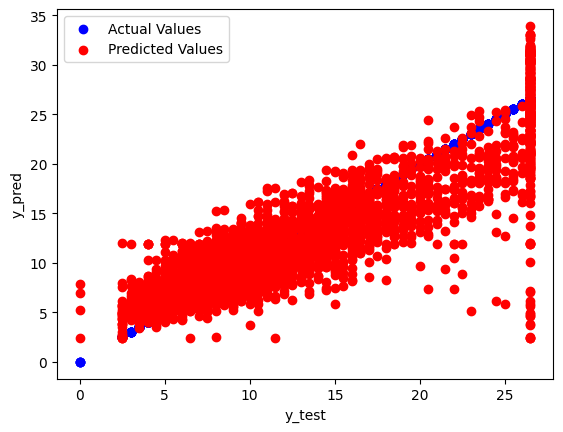

In [45]:
# visualize model result
plt.scatter(y_test, y_test, color='blue', label='Actual Values') # Plot y_test against itself for perfect prediction line
plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

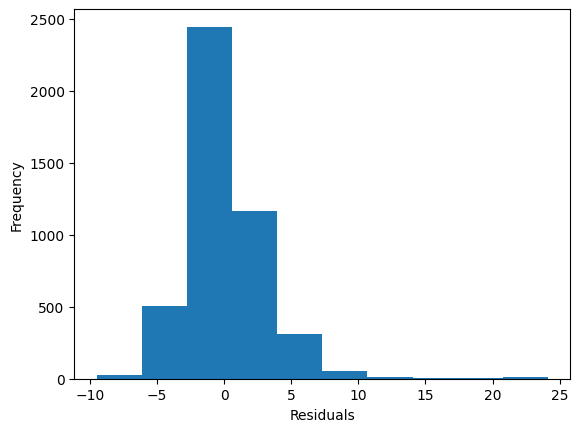

In [46]:
# hist of residuals
residuals = y_test - y_pred
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [47]:
# model parameters
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [ 0.0059311   1.62005303  4.63246821  0.02792427 -0.02401904]
Intercept: 11.650163555261853
